# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [2]:
import os
print(os.getcwd())

c:\users\parul\scaling_to_production\02_activities\assignments


In [30]:
import pandas as pd
columns = [
    'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
]
fires_dt = (pd.read_csv('../../05_src/data/fires/forestfires.csv', header = None, names = columns))

# Drop first row
fires_dt = fires_dt.iloc[1:]

# Numeric columns to numeric types
numeric_columns = ['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area']
fires_dt[numeric_columns] = fires_dt[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
fires_dt = fires_dt.dropna()

print(fires_dt.head())


   coord_x  coord_y month  day  ffmc   dmc     dc  isi  temp  rh  wind  rain  \
1        7        5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   
2        7        4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   
3        7        4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   
4        8        6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   
5        8        6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   

   area  
1   0.0  
2   0.0  
3   0.0  
4   0.0  
5   0.0  


In [33]:
print(fires_dt.info())

print(fires_dt.describe())

# Target variable
target = 'area'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 1 to 517
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coord_x  517 non-null    int64  
 1   coord_y  517 non-null    int64  
 2   month    517 non-null    object 
 3   day      517 non-null    object 
 4   ffmc     517 non-null    float64
 5   dmc      517 non-null    float64
 6   dc       517 non-null    float64
 7   isi      517 non-null    float64
 8   temp     517 non-null    float64
 9   rh       517 non-null    int64  
 10  wind     517 non-null    float64
 11  rain     517 non-null    float64
 12  area     517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
          coord_x     coord_y        ffmc         dmc          dc         isi  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313

# Get X and Y

Create the features data frame and target data.

In [34]:
# Check NaN values in target
print(fires_dt['area'].isnull().sum())

fires_dt = fires_dt.dropna(subset=['area'])

0


In [35]:
X = fires_dt.drop(columns=['area'])  # Assuming 'area' is the target variable
Y = fires_dt['area']

print("X.head():")
print(X.head())
print("Y.head():")
print(Y.head())

X.head():
   coord_x  coord_y month  day  ffmc   dmc     dc  isi  temp  rh  wind  rain
1        7        5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0
2        7        4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0
3        7        4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0
4        8        6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2
5        8        6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0
Y.head():
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: area, dtype: float64


# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [36]:
# preproc1
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = ['ffmc', 'dmc', 'dc','isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day', 'coord_x', 'coord_y']

# Define steps
preproc1 = ColumnTransformer([
    ('numeric', StandardScaler(), numeric_features),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [37]:
# preproc2

from sklearn.preprocessing import RobustScaler, FunctionTransformer
import numpy as np
# Additional imports may be needed

# Define STeps
def custom_transform(X):
    return np.log1p(X)

preproc2 = ColumnTransformer([
    ('numeric', RobustScaler(), numeric_features),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('custom', FunctionTransformer(func=custom_transform), numeric_features)
])

## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [38]:
# Pipeline A = preproc1 + baseline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', Ridge())
])

In [39]:
# Pipeline B = preproc2 + baseline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', LinearRegression())
])

In [40]:
# Pipeline C = preproc1 + advanced model

from sklearn.ensemble import GradientBoostingRegressor

pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', GradientBoostingRegressor())
])

In [41]:
# Pipeline D = preproc2 + advanced model
from sklearn.ensemble import RandomForestRegressor

pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor())
])

# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [42]:
from sklearn.model_selection import GridSearchCV

# Define for Ridge Regression
param_grid_rr = {
    'regressor__alpha': [0.1, 1.0, 10.0]
}

grid_A = GridSearchCV(pipeline_A, param_grid_rr, cv=5, scoring='neg_mean_squared_error')
grid_A.fit(X, Y)
print("Best parameters for Pipeline A:", grid_A.best_params_)

Best parameters for Pipeline A: {'regressor__alpha': 10.0}


In [43]:
# Define Linear Regression
param_grid_linear = {
    'regressor__fit_intercept': [True, False]
}

grid_B = GridSearchCV(pipeline_B, param_grid_linear, cv=5, scoring='neg_mean_squared_error')
grid_B.fit(X, Y)
print("Best parameters for Pipeline B (Linear Regression):", grid_B.best_params_)

Best parameters for Pipeline B (Linear Regression): {'regressor__fit_intercept': True}


In [44]:
# Define for Gradientboosting regressor
param_grid_gbr = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 10]
}

grid_C = GridSearchCV(pipeline_C, param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_C.fit(X, Y)
print("Best parameters for Pipeline C:", grid_C.best_params_)

Best parameters for Pipeline C: {'regressor__max_depth': 3, 'regressor__n_estimators': 50}


In [45]:
# Define for Randomforest Regressor
param_grid_rf = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [3, 5, 10]
}

grid_D = GridSearchCV(pipeline_D, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_D.fit(X, Y)
print("Best parameters for Pipeline D:", grid_D.best_params_)

Best parameters for Pipeline D: {'regressor__max_depth': 3, 'regressor__n_estimators': 50}


# Evaluate

+ Which model has the best performance?

In [55]:
best_score_A = grid_A.best_score_
print("Best Neg MSE for Pipeline A:", best_score_A)

Best Neg MSE for Pipeline A: -4338.309515823405


In [54]:
best_score_B = grid_B.best_score_
print("Best MSE Neg for Pipeline B:", best_score_B)

Best MSE Neg for Pipeline B: -5338.573176813028


In [53]:
best_score_C = grid_C.best_score_
print("Best Neg MSE for Pipeline C:", best_score_C)

Best Neg MSE for Pipeline C: -4672.162970536214


In [52]:
best_score_D = grid_D.best_score_
print("Best Neg MSE for Pipeline D:", best_score_D)

Best Neg MSE for Pipeline D: -4728.8922440403485


Pipeline A with the Ridge Regression has the highest negative MSE score and hence is the best performing model.

# Export

+ Save the best performing model to a pickle file.

In [57]:
import joblib

# Save Pipeline A model to pickle
joblib.dump(grid_A.best_estimator_, 'best_model_pipeline_A.pkl')

['best_model_pipeline_A.pkl']

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

  0%|          | 0/100 [00:00<?, ?it/s]

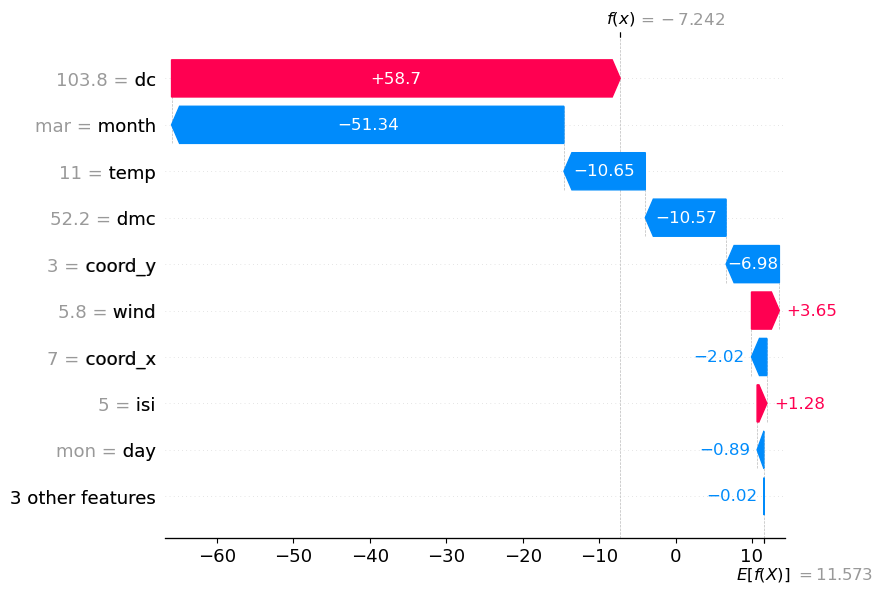

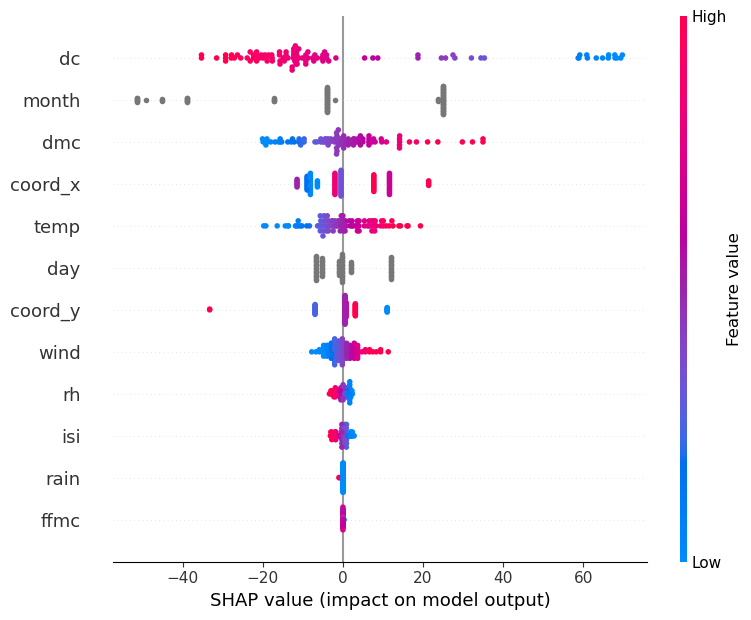

In [70]:
import shap
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LinearRegression

def custom_transform(X):
    # Define your custom transformation here
    return X

# Ensure X is a DataFrame
if not isinstance(X, pd.DataFrame):
    X = pd.DataFrame(X)

numeric_features = ['ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain']
categorical_features = ['month', 'day', 'coord_x', 'coord_y']

# Define pipeline again only way SHAP is working after many tries
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', RobustScaler(), numeric_features),
        ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('custom', FunctionTransformer(func=custom_transform), numeric_features)
    ]
)

pipeline_A = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_A.fit(X, Y)

# Wrapper funcion
def model_predict(data):
    if isinstance(data, pd.DataFrame):
        return pipeline_A.predict(data)
    else:
        return pipeline_A.predict(pd.DataFrame(data, columns=X.columns))

# Sample data to use for SHAP background
X_sample = shap.sample(X, 100)  # Adjust the number of samples as needed

# Create KernelExplainer
explainer = shap.KernelExplainer(model_predict, X_sample)

# Compute SHAP values for the entire sample
shap_values = explainer.shap_values(X_sample)

# Selecting an observation
observation_index = 0  # Change this index as needed
shap_value_sample = shap_values[observation_index]

# Visualise
shap.waterfall_plot(shap.Explanation(values=shap_value_sample, base_values=explainer.expected_value, data=X_sample.iloc[observation_index], feature_names=X_sample.columns))

# Visualize summary plot
shap.summary_plot(shap_values, X_sample, feature_names=X_sample.columns)


Part 1
Below are some key points from the SHAP waterfall plot for the X_sample. 
•	dc has the most positive impact (prediction increasing by 58.7 units).
•	month has a most negative impact.
•	temp, dmc and coord_y also has negative impacts.
•	wind and isi have minor positive impacts.
The above are the key features of Pipeline A model.

AS per the SHAP summary plot below are the key points which hold true across the complete training set 
1.	dc and month have most impact overall.
2.	dmc, coord_x, and temp also have high impact.
3.	day, coord_y, wind, rh, isi, rain, and ffmc have less impact on the model's predictions.

Part 2
Looking at the SHAP summary plot features such as day, coord_y, rh, isi, rain, and ffmc, can be considered for removal as these features have small SHAP values. Less features will mean simplified model and improved performance. As it is these features most probably have very less impact.
I would test by retraining the model without these features the evaluate both models (compare) using metrics like MSE etc. And then I would analyze the metrics to judge if the performance changes (drops/same/better)


*(Answer here.)*

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.